Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
import zipfile
# Path to the zip file
zip_path = 'C:/Users/chsan/Desktop/Python projects/Banking-logisticRegression/archive.zip'

# Step 2: Read the specific CSV file inside the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('bank-additional-full.csv') as file:
        df = pd.read_csv(file, delimiter=';')
        

Data Overview

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.groupby('education').size()

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64

In [7]:
df['education']=np.where(df['education'].isin(['basic.4y','basic.6y','basic.9y']),'basic',df['education'])
df['education'].value_counts()

education
basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: count, dtype: int64

Exploratory Data Analysis

In [8]:
df['y'].value_counts(normalize=True)*100

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

In [9]:

df.groupby('y').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [10]:
#changing the target categorical variable to numerical value
df1=df.copy()
df1['y']=df['y'].map({'yes':1,'no':0})

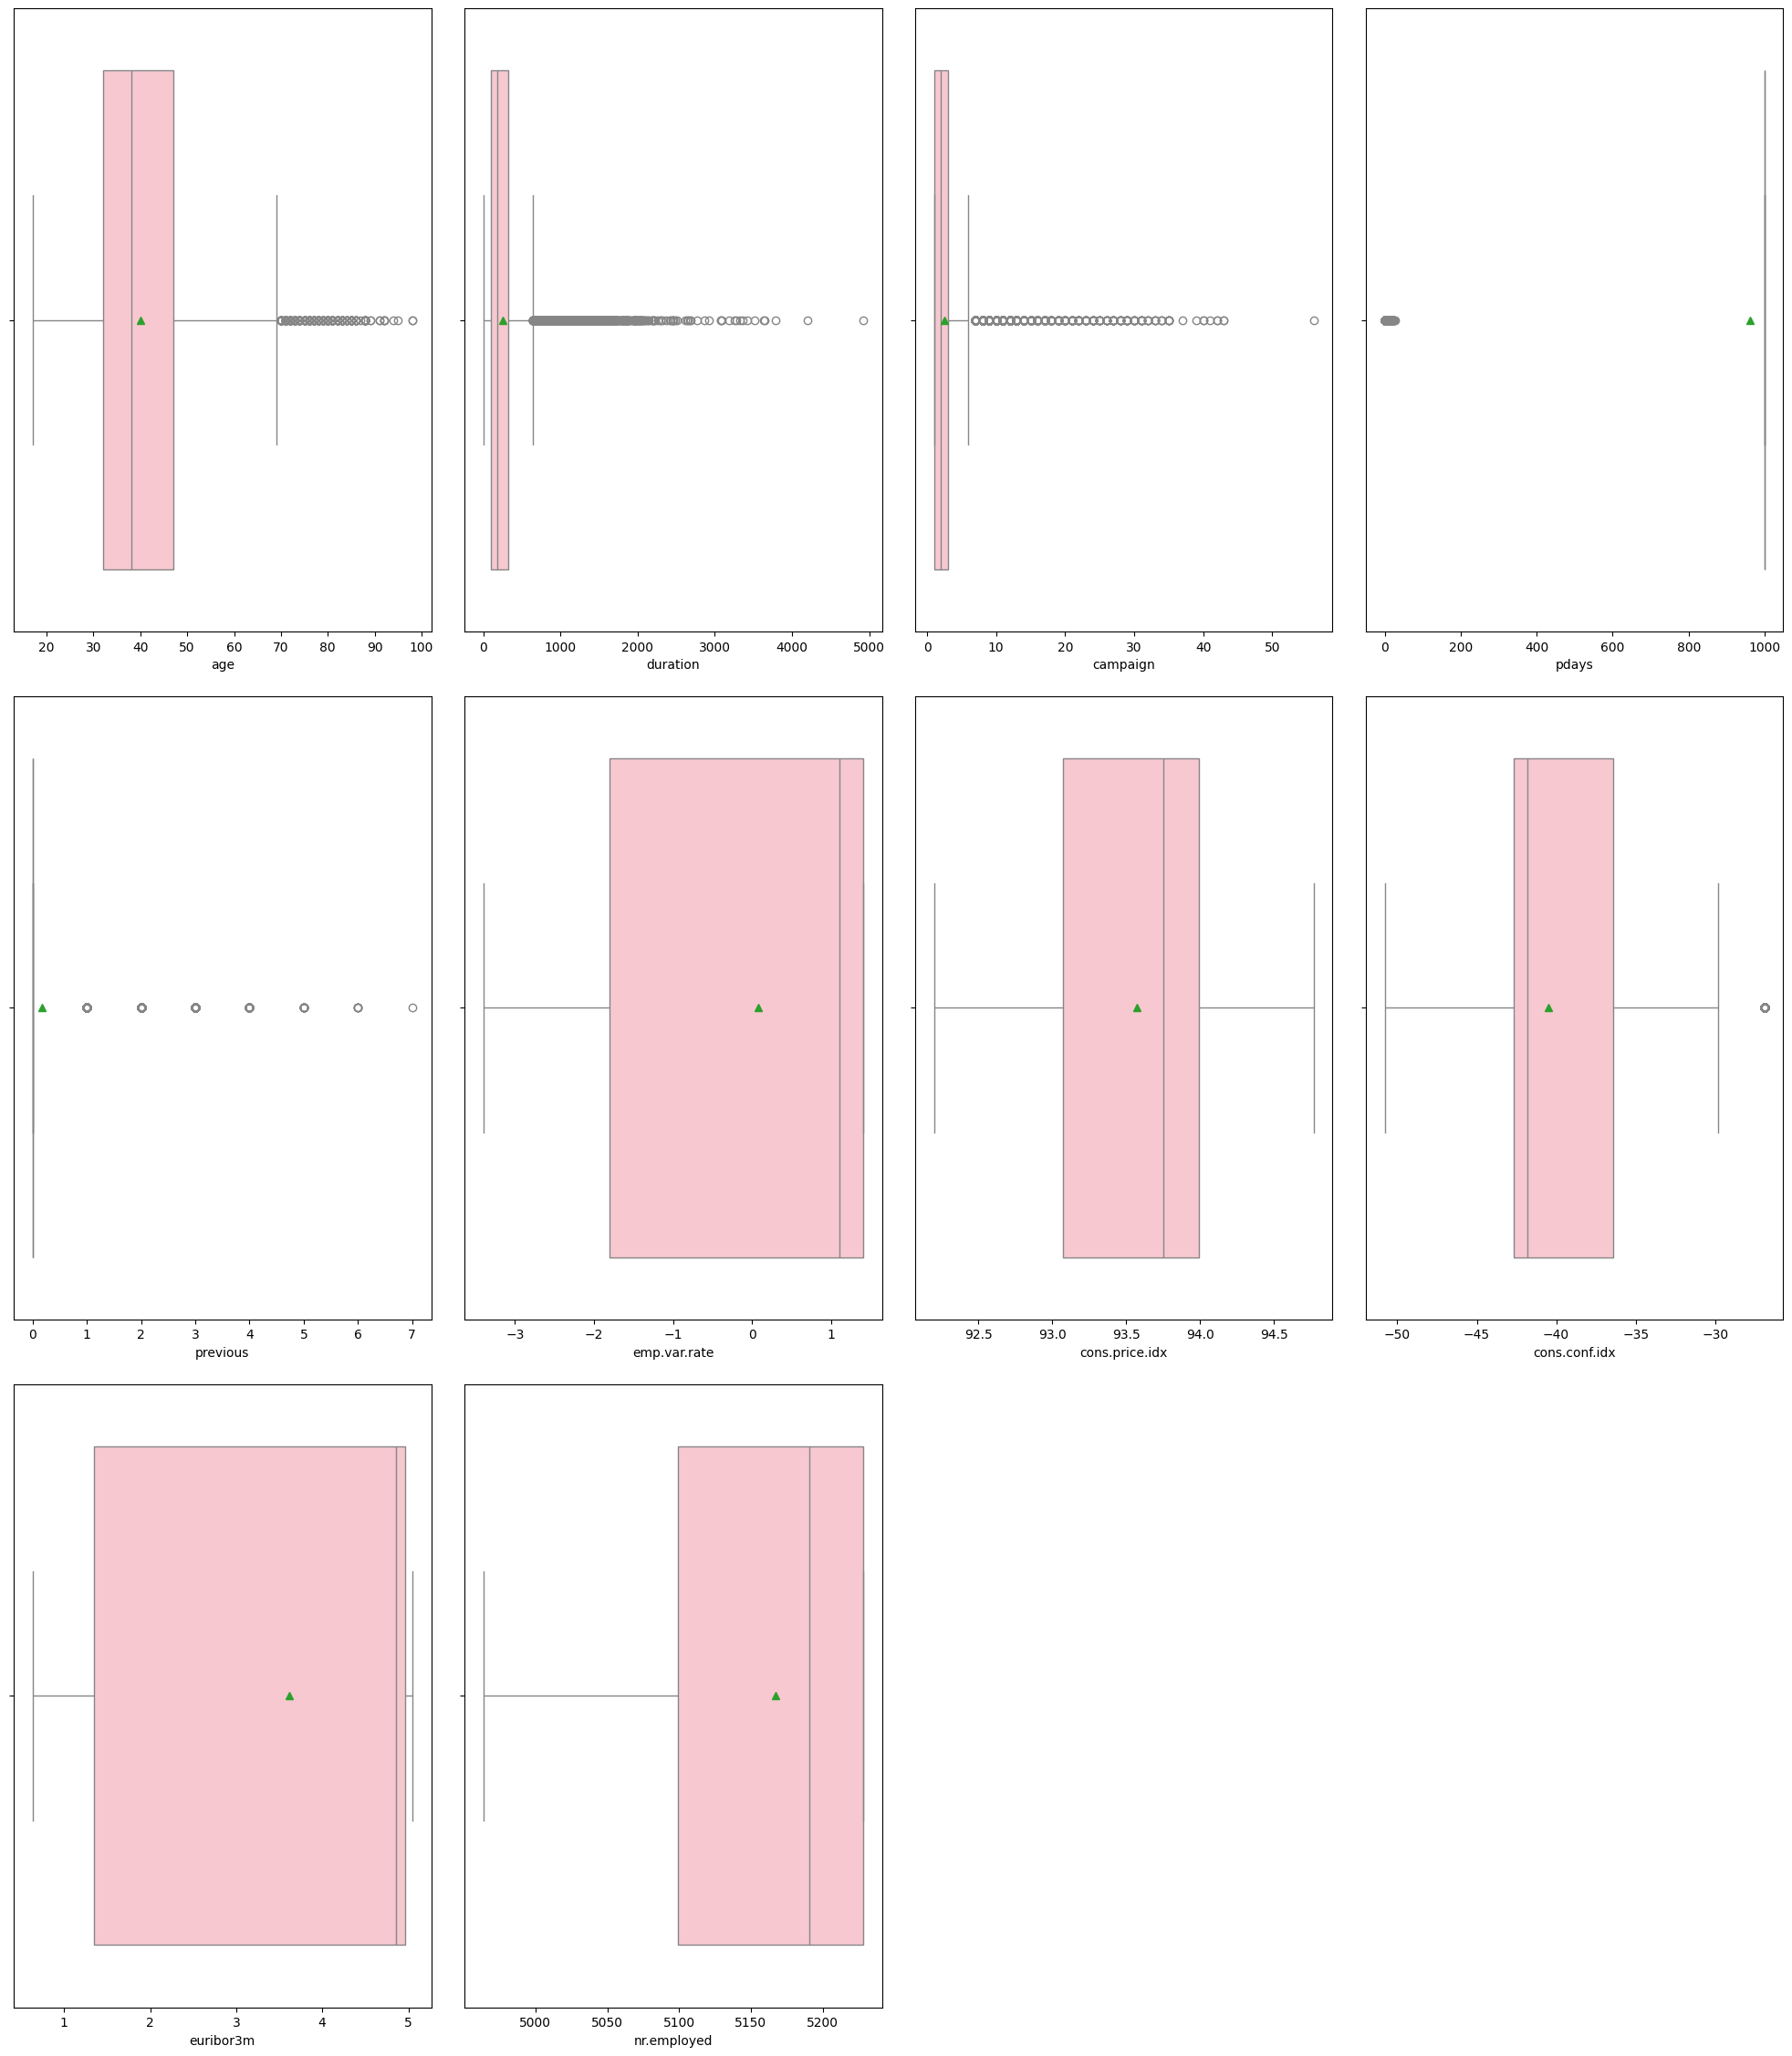

In [11]:
plt.figure(figsize=(20,30))
cols=df.select_dtypes(include=np.number).columns.tolist()
for i, var in enumerate(cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df1,x=var, showmeans=True,color='pink')
    plt.tight_layout(pad=2)
plt.show()

In [12]:
#changing the target categorical variable to numerical value
df1=df.copy()
df1['y']=df['y'].map({'yes':1,'no':0})

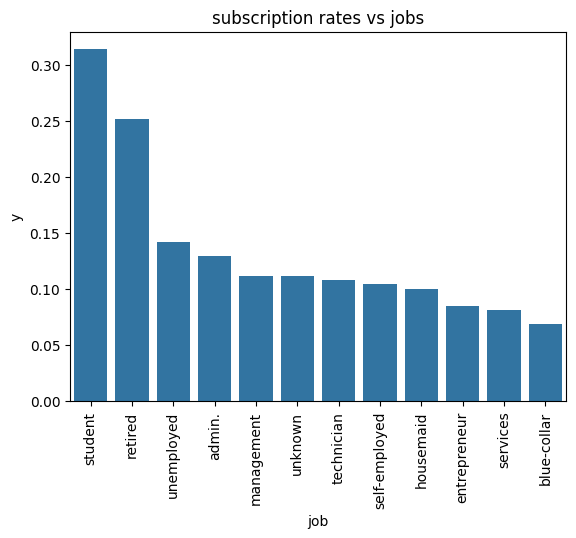

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
unemployed,39.733728,249.451677,2.564103,935.316568,0.199211,-0.111736,93.563781,-40.007594,3.466583,5157.156509,0.142012
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
unknown,45.563636,239.675758,2.648485,938.727273,0.154545,0.357879,93.718942,-38.797879,3.949033,5172.931818,0.112121
technician,38.507638,250.232241,2.577339,964.408127,0.153789,0.274566,93.561471,-39.927569,3.820401,5175.648391,0.108260
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000


In [13]:
df2=df1.groupby('job').mean(numeric_only=True).sort_values(by=['y'],ascending=False)
sns.barplot(data=df2,x='job',y='y')
plt.title('subscription rates vs jobs')
plt.xticks(rotation=90)
plt.show()
df2

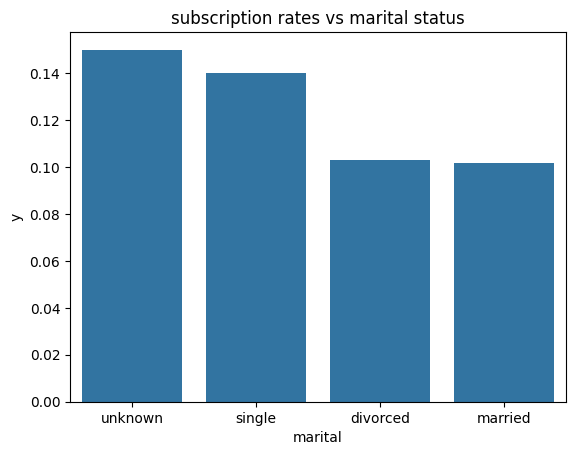

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573


In [14]:
df2=df1.groupby('marital').mean(numeric_only=True).sort_values(by=['y'],ascending=False)
sns.barplot(data=df2,x='marital',y='y')
plt.title('subscription rates vs marital status')
plt.show()
df2

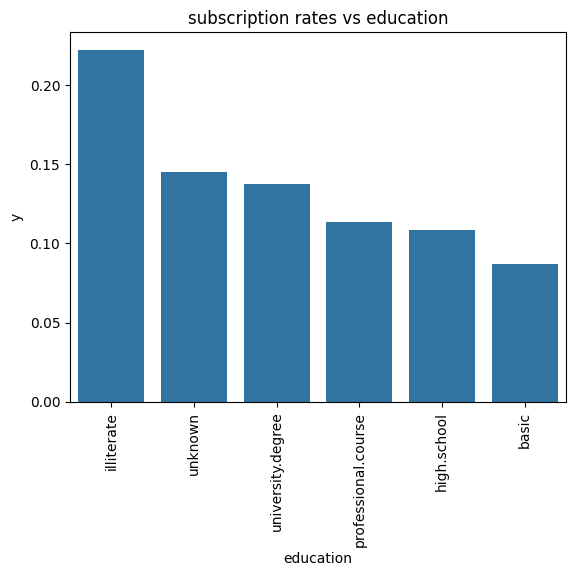

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029


In [15]:
df2=df1.groupby('education').mean(numeric_only=True).sort_values(by=['y'],ascending=False)
sns.barplot(data=df2,x='education',y='y')
plt.xticks(rotation=90)
plt.title('subscription rates vs education')
plt.show()
df2

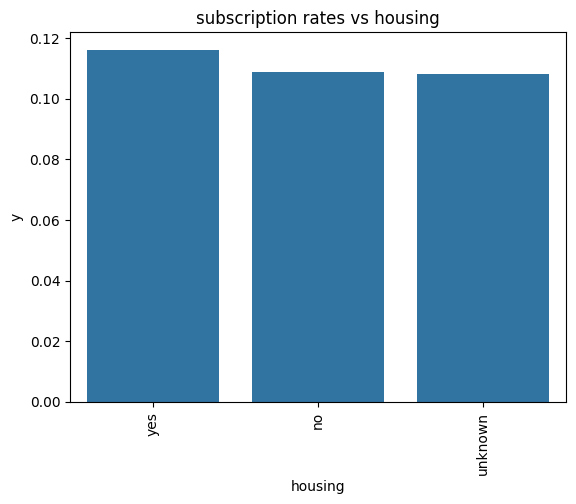

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
housing,,,,,,,,,,,
yes,40.010011,256.603217,2.539071,960.565304,0.182610,-0.007773,93.530456,-40.654811,3.523873,5163.932949,0.116194
no,40.044195,260.663677,2.601010,964.559875,0.161153,0.184089,93.624836,-40.337590,3.732474,5170.661857,0.108796
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081


In [16]:
df2=df1.groupby('housing').mean(numeric_only=True).sort_values(by=['y'],ascending=False)
sns.barplot(data=df2,x='housing',y='y')
plt.xticks(rotation=90)
plt.title('subscription rates vs housing')
plt.show()
df2

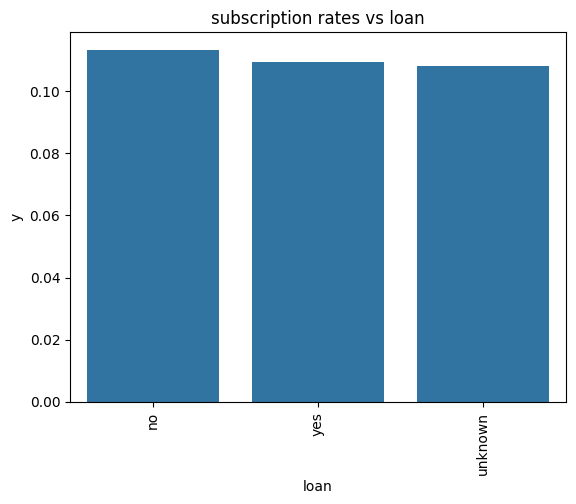

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
loan,,,,,,,,,,,
no,40.058822,258.507246,2.561414,962.411841,0.173078,0.080150,93.575402,-40.481284,3.620732,5166.920563,0.113402
yes,39.846671,258.359315,2.602273,962.437420,0.170455,0.086316,93.567529,-40.652241,3.619294,5167.754369,0.109315
unknown,39.951515,250.194949,2.560606,964.896970,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081


In [17]:
df2=df1.groupby('loan').mean(numeric_only=True).sort_values(by=['y'],ascending=False)
sns.barplot(data=df2,x='loan',y='y')
plt.xticks(rotation=90)
plt.title('subscription rates vs loan')
plt.show()
df2

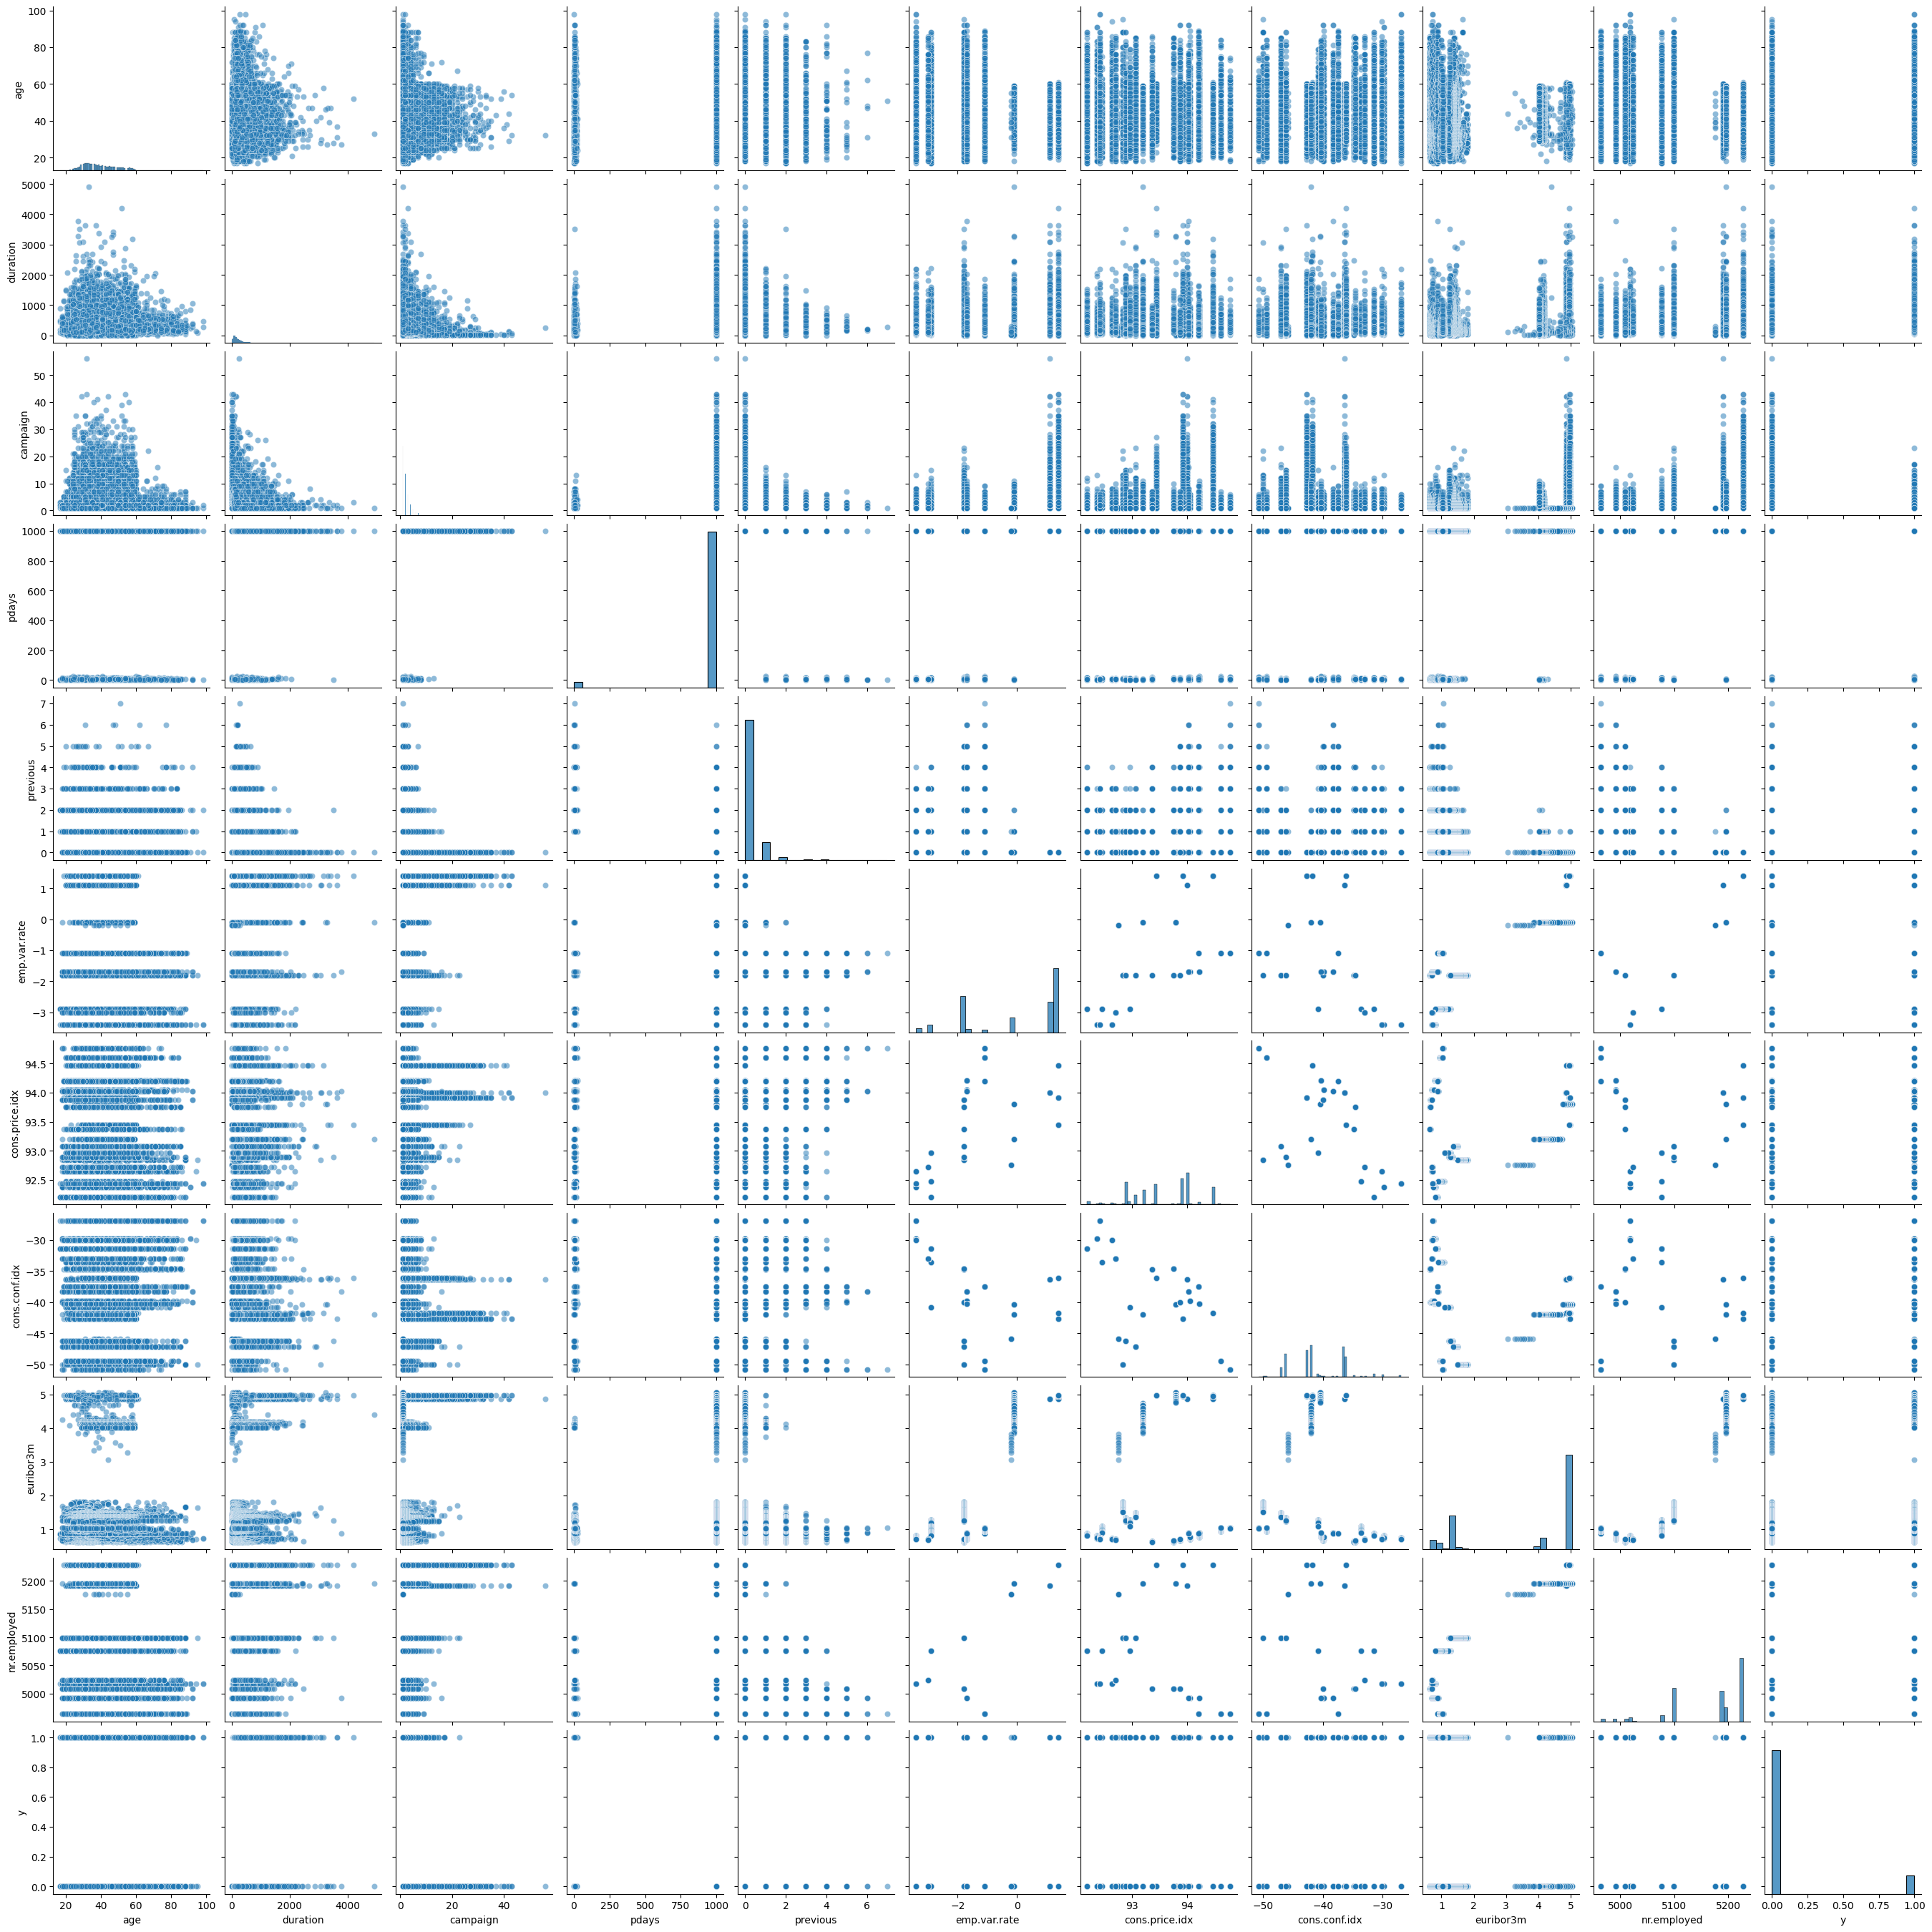

In [18]:
sns.pairplot(data=df1,kind='scatter',plot_kws={'alpha':0.5})
plt.show()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


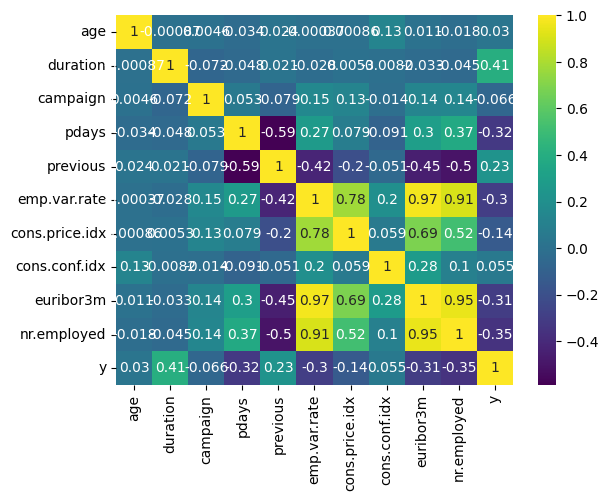

In [19]:
df2=df1.drop(df1.select_dtypes(include=['object','category']).columns.tolist(),axis=1)
sns.heatmap(df2.corr(),annot=True,cmap='viridis')
df2.head()



Data Processing

In [20]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Feature Engineering

converting categorical data to numerical value

In [21]:
#explicitly converting target varibale to numerical values
df['y']=df['y'].map({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [22]:
#creating dummy variables
df=pd.get_dummies(df,columns=df.select_dtypes(include=['object','category']).columns.tolist(),drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [23]:
#explicitly mapping false to 0 and true to 0
cols=df.select_dtypes(include=['bool']).columns.tolist()
for col in cols:
    df[col]=df[col].map({False:0,True:1})
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


Normalizing data

In [24]:
#, age is between 18 and 70, but euribor3m ranges from 0 to 5, and nr.employed ranges from 0 to 5000).so scaling them
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#creating an instance of standard scalar
scaler=StandardScaler()
#splitting data set to training and testing
X=df.drop('y',axis=1)
y=df['y']
#cols contains the sepcified columns to be normalized
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print("no of rows in training set",X_train.shape)
print("no of rows in testing set",X_test.shape)
#fit the scaler to data and transform data
X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])


no of rows in training set (28831, 51)
no of rows in testing set (12357, 51)


In [25]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39075,-1.053709,-0.695116,0.154139,0.19335,1.673800,-1.962634,-1.490923,1.621455,-1.678565,-1.978346,...,0,0,0,0,1,0,0,0,0,0
34855,-1.053709,-0.944916,0.517478,0.19335,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,...,1,0,0,0,0,0,0,0,1,0
7107,0.477399,0.073498,-0.209199,0.19335,-0.349144,0.647250,0.718902,0.887871,0.713705,0.330682,...,1,0,0,0,0,1,0,0,1,0
31614,-0.575238,-0.722018,-0.572537,0.19335,1.673800,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182,...,1,0,0,0,0,1,0,0,0,0
34878,-0.766626,3.547637,2.334170,0.19335,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182,...,1,0,0,0,0,0,0,0,1,0


Modelling With Over-sampling using SMOTE

In [26]:
#since our classes are unbalanced,we are using SMOTE technique  to balance imbalanced datasets by generating synthetic examples rather 
#than duplicating existing examples
#steps to apply SMOTE using imblearn library:
#1.Import the necessary libraries.
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [27]:
#2.Split your data into training and testing sets.
#3.Apply SMOTE to the training data (not the test data).
os = SMOTE(random_state=42)
columns = X_train.columns
X_train_resampled, y_train_resampled = os.fit_resample(X_train, y_train)


In [28]:
#4.Check the distribution of the classes before and after applying SMOTE.
print("original y_train class distribution ",y_train.value_counts())
print("original class proprotion",y_train.value_counts(normalize=True)*100)
print("resampled y_train class distribution ",y_train_resampled.value_counts())
print("resampled y_train class proportion ",y_train_resampled.value_counts(normalize=True)*100)

original y_train class distribution  y
0    25580
1     3251
Name: count, dtype: int64
original class proprotion y
0    88.723943
1    11.276057
Name: proportion, dtype: float64
resampled y_train class distribution  y
0    25580
1    25580
Name: count, dtype: int64
resampled y_train class proportion  y
0    50.0
1    50.0
Name: proportion, dtype: float64


Recursive Feature Elimination

In [29]:
#from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Initialize the model- Logistic Regression
model = LogisticRegression()
# Initialize RFE with the model and the desired number of features to keep
rfe = RFE(estimator=model, n_features_to_select=20)
# Fit RFE to the data
rfe = rfe.fit(X_train_resampled, y_train_resampled)
# Print which features were selected (True = selected, False = removed)
print("Selected features:",rfe.support_)
# Rank the features (1 is the most important)
print("Feature rankings:",rfe.ranking_)
selected_features = X_train_resampled.columns[rfe.support_]
print("Selected features (by name):", selected_features)

Selected features: [False  True False False False  True False False False False  True  True
  True  True False  True  True False False  True  True False False False
 False False  True False  True False False  True False False False False
 False False False False  True  True False False False  True  True  True
  True False  True]
Feature rankings: [28  1 26 27 30  1 10 31  8 24  1  1  1  1  4  1  1 17  5  1  1 21 20 19
  2 29  1  3  1 13 32  1 23 22 16  9 25  6 12 11  1  1  7 15 14  1  1  1
  1 18  1]
Selected features (by name): Index(['duration', 'emp.var.rate', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_self-employed', 'job_services',
       'job_unemployed', 'job_unknown', 'education_professional.course',
       'education_unknown', 'housing_unknown', 'month_mar', 'month_may',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success'],
      dtype='object')


In [30]:
X_train_selected=X_train_resampled[selected_features]
y_train_selected=y_train_resampled
X_test_selected=X_test[selected_features]


Logistic Regression Model

In [31]:
# Import required libraries
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

# Adding an intercept (constant) column to the features (X_train and X_test)
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

# Build the logistic regression model using statsmodels
model = sm.Logit(y_train_selected, X_train_selected).fit()

# Display the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.293408
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51160
Model:                          Logit   Df Residuals:                    51139
Method:                           MLE   Df Model:                           20
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.5767
Time:                        10:06:15   Log-Likelihood:                -15011.
converged:                       True   LL-Null:                       -35461.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4433      0.032     13.980      0.

Modelling without SMOTE(using unbalanced datasets)

Recursive Feature Elimination

In [32]:
#from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Initialize the model- Logistic Regression
model = LogisticRegression()
# Initialize RFE with the model and the desired number of features to keep
rfe = RFE(estimator=model, n_features_to_select=20)
# Fit RFE to the data
rfe = rfe.fit(X_train, y_train)
# Print which features were selected (True = selected, False = removed)
print("Selected features:",rfe.support_)
# Rank the features (1 is the most important, higher numbers indicate 
print("Feature rankings:",rfe.ranking_)
selected_features = X_train.columns[rfe.support_]
print("Selected features (by name):", selected_features)

Selected features: [False  True False  True False  True  True False  True False False False
 False False  True  True False  True False False  True False False False
 False False False  True False  True False False False False False  True
  True False False  True  True  True  True False False False False False
  True  True  True]
Feature rankings: [25  1  7  1 22  1  1 18  1 24  4  6 11 14  1  1 12  1 28 27  1 29 30 15
 21  8 26  1 20  1 31 19 17 16 32  1  1 23  9  1  1  1  1 10  5 13  3  2
  1  1  1]
Selected features (by name): Index(['duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'job_retired', 'job_self-employed', 'job_student', 'job_unknown',
       'education_university.degree', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [33]:
X_train_selected1=X_train[selected_features]
y_train_selected1=y_train
X_test_selected1=X_test[selected_features]

In [34]:
y_train_selected1.shape

(28831,)

logistic regression model

In [35]:
# Import required libraries
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

# Adding an intercept (constant) column to the features (X_train and X_test)
X_train_selected1 = sm.add_constant(X_train_selected1)
X_test_selected1 = sm.add_constant(X_test_selected1)

# Build the logistic regression model using statsmodels
model = sm.Logit(y_train_selected1, X_train_selected1).fit()

# Display the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.210054
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28810
Method:                           MLE   Df Model:                           20
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.4037
Time:                        10:06:25   Log-Likelihood:                -6056.1
converged:                       True   LL-Null:                       -10156.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.1554      0.089    -35.621      0.000   

Cross Validation to make sure that the model generalizes well

In [36]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Create the KFold cross-validator (10-fold)
kf = KFold(n_splits=10, shuffle=True, random_state=7)

# List to hold accuracy scores for each fold
accuracies = []

# Loop through each fold
for train_index, test_index in kf.split(X_train_selected1):
    # Split the data into training and testing sets
    X_train_fold, X_test_fold = X_train_selected1.iloc[train_index], X_train_selected1.iloc[test_index]
    y_train_fold, y_test_fold = y_train_selected1.iloc[train_index], y_train_selected1.iloc[test_index]
    
    # Add a constant (intercept) to the model (Statsmodels requires this)
    X_train_fold = sm.add_constant(X_train_fold)
    X_test_fold = sm.add_constant(X_test_fold)
    
    # Fit the logistic regression model
    model = sm.Logit(y_train_fold, X_train_fold).fit()
  
    # Make predictions on the test set
    y_pred_prob = model.predict(X_test_fold)
    
    # Convert probabilities to binary outcomes (0 or 1)
    y_pred = (y_pred_prob >= 0.5).astype(int)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)

# Calculate the average accuracy across all 10 folds
average_accuracy = np.mean(accuracies)
print(f"10-fold Cross-Validation Average Accuracy: {average_accuracy:.3f}")


Optimization terminated successfully.
         Current function value: 0.209752
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210714
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210336
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210343
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209256
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.208534
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209245
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210968
  

In [37]:

# Making predictions on the test data with SMOTE
y_pred = model.predict(X_test_selected)  # Predicted probabilities
y_pred = (y_pred>= 0.5).astype(int)  # Converting probabilities to binary outcomes (0 or 1)

# Accuracy of the model
accuracy = (y_pred == y_test).mean()
print('accuracy',accuracy*100)

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))


accuracy 88.40333414259123
Confusion Matrix:
[[10623   345]
 [ 1088   301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.47      0.22      0.30      1389

    accuracy                           0.88     12357
   macro avg       0.69      0.59      0.62     12357
weighted avg       0.86      0.88      0.86     12357



In [38]:

# Making predictions on the test data
y_pred = model.predict(X_test_selected1)  # Predicted probabilities
y_pred = (y_pred>= 0.5).astype(int)  # Converting probabilities to binary outcomes (0 or 1)

# Accuracy of the model
accuracy = (y_pred == y_test).mean()
print('accuracy',accuracy*100)

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))


accuracy 91.13053330096301
Confusion Matrix:
[[10673   295]
 [  801   588]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



Optimization terminated successfully.
         Current function value: 0.210054
         Iterations 8


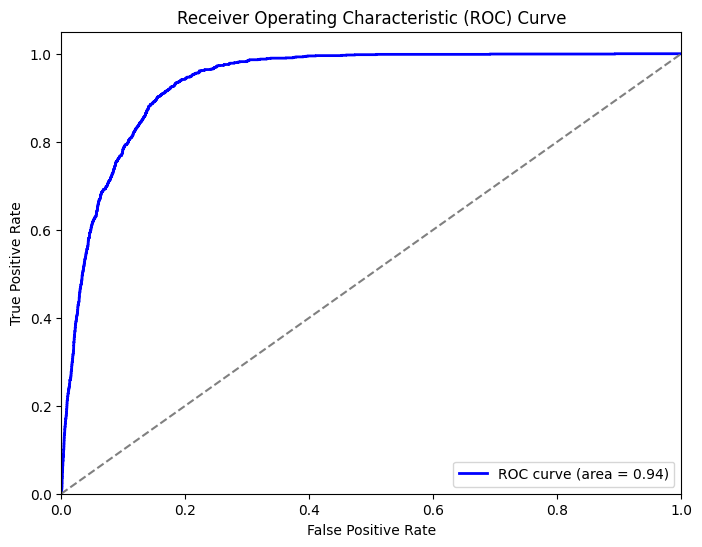

AUC: 0.937


In [39]:
from sklearn.metrics import roc_curve, auc
# constants are alreay added in above steps and Train a logistic regression model using statsmodels 
model = sm.Logit(y_train_selected1, X_train_selected1).fit()

# Get predicted probabilities on the test set
y_pred = model.predict(X_test_selected1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.3f}")
